#  Projeto de Doenças Cardiovasculares - Regressão Logística


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [ ]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [ ]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

print("linhas da base de dados\n", len(base))

print("____________________________________________________________")

print("Base de dados\n", base.head())

print("____________________________________________________________")

print("Valores nulos encontrados\n", base.isnull().sum())

print("____________________________________________________________")

print("Categorias dos dados\n", base.dtypes)

print("____________________________________________________________")

print(base.describe())

print("____________________________________________________________")

#Converta 'weight' em numérico, corrigindo vírgulas e erros
base['weight'] = base['weight'].str.replace(',', '.', regex=False)
base['weight'] = pd.to_numeric(base['weight'], errors='coerce')

#Removendo as linhas onde 'peso' não pôde ser convertido
base_cleaned = base.dropna(subset=['weight']).copy()



linhas da base de dados
 10000
____________________________________________________________
Base de dados
    age  gender  height weight  cholesterol  gluc  smoke  alco  active  \
0   50       2     168     62            1     1      0     0       1   
1   55       1     156     85            3     1      0     0       1   
2   52       1     165     64            3     1      0     0       0   
3   48       2     169     82            1     1      0     0       1   
4   48       1     156     56            1     1      0     0       0   

   cardio_disease  
0               0  
1               1  
2               1  
3               1  
4               0  
____________________________________________________________
Valores nulos encontrados
 age               0
gender            0
height            0
weight            0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio_disease    0
dtype: int64
_________________________________

# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico 1: Relação entre Idade e Doença Cardiovascular
plt.figure(figsize=(10, 6))
sns.histplot(data=base, x='age', hue='cardio_disease', multiple='stack', kde=True)
plt.title('Distribuição da Idade por Doença Cardiovascular')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

print("Insight 1: O gráfico mostra que a proporção de pessoas com doença cardiovascular tende a aumentar com a idade, especialmente a partir dos 50 anos.")


In [ ]:
# Gráfico 2: Relação entre Fumar e Doença Cardiovascular
plt.figure(figsize=(8, 5))
sns.countplot(data=base, x='smoke', hue='cardio_disease')
plt.title('Distribuição de Fumantes por Doença Cardiovascular')
plt.xlabel('Fumante (1: Sim, 0: Não)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não Fumante', 'Fumante'])
plt.show()

print("Insight 2: O gráfico de barras sugere que, entre os fumantes (smoke=1), há uma proporção maior de indivíduos com doença cardiovascular (cardio_disease=1) em comparação com os não fumantes.")


In [ ]:
# Gráfico 3: Relação entre Atividade Física e Doença Cardiovascular
plt.figure(figsize=(8, 5))
sns.countplot(data=base, x='active', hue='cardio_disease')
plt.title('Distribuição de Atividade Física por Doença Cardiovascular')
plt.xlabel('Ativo (1: Sim, 0: Não)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Inativo', 'Ativo'])
plt.show()

print("Insight 3: Aparentemente, realizar atividades físicas (active=1) está associado a uma menor proporção de indivíduos com doença cardiovascular (cardio_disease=1), indicando um potencial benefício da atividade física na prevenção de doenças cardiovasculares.")


In [ ]:
# Gráfico 4: Relação entre Gênero e Doença Cardiovascular
plt.figure(figsize=(8, 5))
sns.countplot(data=base, x='gender', hue='cardio_disease')
plt.title('Distribuição de Gênero por Doença Cardiovascular')
plt.xlabel('Gênero (1: Homem, 2: Mulher)')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Homem', 'Mulher'])
plt.show()

print("Insight 4: O gráfico mostra que a doença cardiovascular está presente em ambos os gêneros, com uma proporção semelhante. É importante notar que, embora haja mais registros de mulheres na base, a proporção de casos de doença cardiovascular em relação ao total de cada gênero parece comparável.")

# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



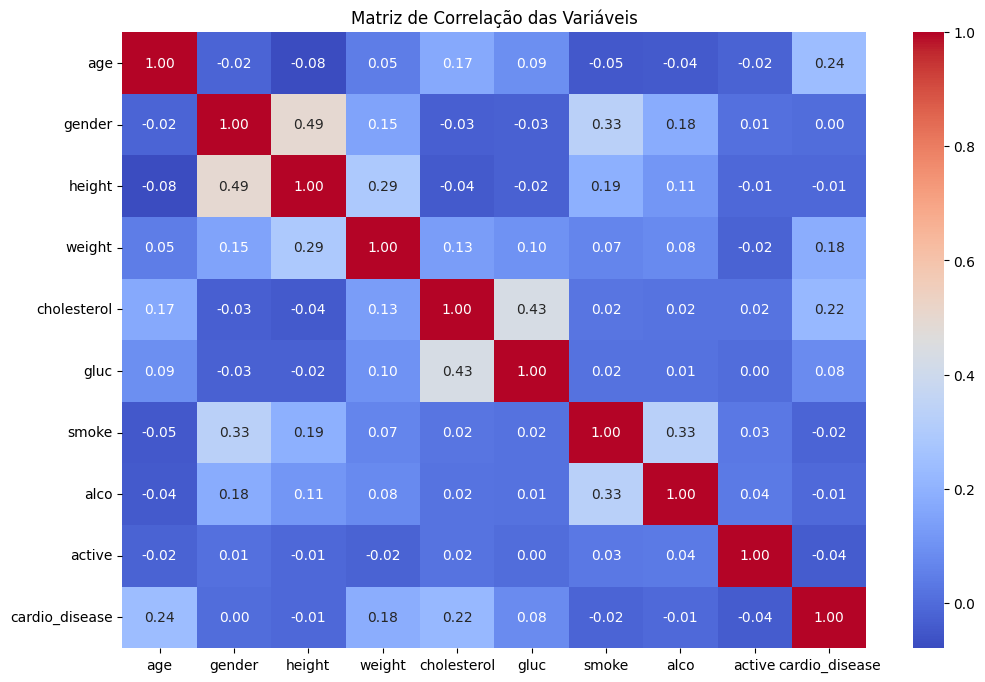

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(base_cleaned.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis')
plt.show()


Insights da Matriz de Correlação:
- As variáveis com as correlações mais fortes (maiores valores absolutos) com a variável alvo `cardio_disease` são `age`, `weight` e `gluc`. Isso sugere que idade, peso e níveis de glicose são fatores importantes para prever doenças cardiovasculares.
- `age` possui a correlação positiva mais forte com `cardio_disease`, reforçando o insight anterior de que a probabilidade de ter a doença aumenta com a idade.
- `weight` e `gluc` também mostram correlações positivas com `cardio_disease`, indicando que ter um peso maior e níveis mais altos de glicose estão associados a uma maior probabilidade de desenvolver a doença.
- A variável `active` tem uma correlação negativa com `cardio_disease`, confirmando o insight anterior de que realizar atividades físicas está associado a uma menor chance de ter a doença cardiovascular.
- As correlações entre as outras variáveis (`gender`, `height`, `smoke`, `alco`) e `cardio_disease` são relativamente baixas, o que sugere que, individualmente, elas podem ter menos impacto na previsão da doença em comparação com `age`, `weight`, `gluc` e `active`. No entanto, isso não significa que não sejam importantes no modelo, pois podem ter interações com outras variáveis.

# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [ ]:
#separando base de treino e teste.
X = base_cleaned.drop('cardio_disease', axis=1)
y = base_cleaned['cardio_disease']

# Dividir dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nTamanho dos conjuntos de dados após a separação:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Ajuste o dados de treinamento.
scaler = StandardScaler()

#  Ajuste o escalonador aos dados de treinamento e transforme os dados de treinamento e de teste.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Convertendo a dimnesionalidade de dados e trazendo de volta para DataFrame.
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

#print("\nDados de treino padronizados (primeiras 5 linhas):")
#print(X_train_scaled_df.head())

# Verifique se os dados estão balanceados, se não, faça o balanceamento.
print("\nVerificando o balanceamento da variável alvo no conjunto de treino:")
print(y_train.value_counts())
print("\nProporção da classe 1 no treino:")
print(y_train.value_counts(normalize=True))

# Verificando também o equilíbrio no conjunto de teste
print("\nVerificando o balanceamento da variável alvo no conjunto de teste:")
print(y_test.value_counts())
print("\nProporção da classe 1 no teste:")
print(y_test.value_counts(normalize=True))

# O conjunto de dados está relativamente balanceado (próximo a 50/50), portanto, o balanceamento pode não ser estritamente necessário,
# especialmente porque usamos stratify=y durante a divisão.
# No entanto, para fins de demonstração ou se o desequilíbrio fosse mais significativo,
# usaríamos uma técnica como SMOTE nos dados de treinamento.
# Como está razoavelmente balanceado, prosseguiremos sem sobreamostragem por enquanto.
# Se tivéssemos que balancear, aplicaríamos o balanceamento apenas aos dados de treinamento.

# usaremos os dados escalonados, mas não balanceados pelo SMOTE, pois o desequilíbrio é pequeno.

# Moved assignment outside of if block
X_train_final = X_train_scaled
y_train_final = y_train
X_test_final = X_test_scaled
y_test_final = y_test

print("conferindo dados")

print("\nPrimeiras 5 linhas da base X_train final (padronizada):")
print(pd.DataFrame(X_train_final, columns=X_train.columns).head())

print("\nPrimeiras 5 linhas da base X_test final (padronizada):")
print(pd.DataFrame(X_test_final, columns=X_test.columns).head())

print("\nVerificação final dos tamanhos:")
print(f"X_train_final: {X_train_final.shape}")
print(f"y_train_final: {y_train_final.shape}")
print(f"X_test_final: {X_test_final.shape}")
print(f"y_test_final: {y_test_final.shape}")


Tamanho dos conjuntos de dados após a separação:
X_train: (7000, 9)
X_test: (3000, 9)
y_train: (7000,)
y_test: (3000,)

Verificando o balanceamento da variável alvo no conjunto de treino:
cardio_disease
1    3522
0    3478
Name: count, dtype: int64

Proporção da classe 1 no treino:
cardio_disease
1    0.503143
0    0.496857
Name: proportion, dtype: float64

Verificando o balanceamento da variável alvo no conjunto de teste:
cardio_disease
1    1509
0    1491
Name: count, dtype: int64

Proporção da classe 1 no teste:
cardio_disease
1    0.503
0    0.497
Name: proportion, dtype: float64
conferindo dados

Primeiras 5 linhas da base X_train final (padronizada):
        age    gender    height    weight  cholesterol      gluc     smoke  \
0 -0.041938 -0.722086  0.447082  0.326683    -0.544637 -0.394431 -0.313387   
1  1.576714 -0.722086 -0.166464 -0.362844     2.403901  3.147602 -0.313387   
2  0.693813 -0.722086  1.060627  0.395636     0.929632  1.376586  3.190942   
3  1.282413  1.384876 

# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as métricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previsões ou não.


Modelo de Regressão Logística treinado com sucesso.

Intercepto do modelo:
[0.03003924]

Coeficientes do modelo:
       Feature  Coefficient
0          age     0.432052
1       gender     0.008912
2       height    -0.093945
3       weight     0.384840
4  cholesterol     0.415566
5         gluc    -0.054333
6        smoke    -0.019102
7         alco    -0.005158
8       active    -0.091339

Métricas de avaliação do modelo no conjunto de teste:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      1491
           1       0.65      0.62      0.63      1509

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000

AUC: 0.6959


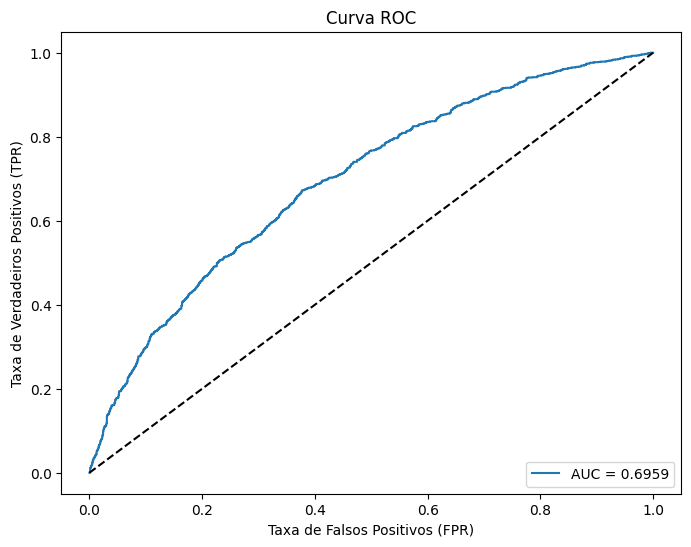


Justificativa sobre o desempenho do modelo:

Análise das Métricas Obtidas:
- Accuracy: 0.6397
- Precisão (classe 1): 0.6482
- Recall (classe 1): 0.6203
- F1-Score (classe 1): 0.6339
- AUC: 0.6959


In [ ]:
# Inicializando o modelo de Regressão Logística
model = LogisticRegression(random_state=42)

# Treinar o modelo com os dados de treino
model.fit(X_train_final, y_train_final)

print("\nModelo de Regressão Logística treinado com sucesso.")

# B) Traga o intercept e os coeficientes.
print("\nIntercepto do modelo:")
print(model.intercept_)

print("\nCoeficientes do modelo:")
# Associar coeficientes aos nomes das features para melhor interpretação
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients)

# Avaliação das métricas do modelo treinado
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_final)
y_prob = model.predict_proba(X_test_final)[:, 1] # Probabilidade da classe positiva (1)

# Avaliar as métricas de classificação
print("\nMétricas de avaliação do modelo no conjunto de teste:")
print(classification_report(y_test_final, y_pred))

# Calcular a Área Sob a Curva ROC (AUC)
auc = roc_auc_score(y_test_final, y_prob)
print(f"AUC: {auc:.4f}")

# Plotar a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_final, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--') # Linha de base aleatória
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


# D) Justifique se te parece que o modelo tem feito boas previsões ou não.

print("\nJustificativa sobre o desempenho do modelo:")

# Analisar as métricas:
# - Precisão (Accuracy): É a proporção de previsões corretas (tanto positivos quanto negativos). Um valor próximo a 1 indica um bom desempenho geral.
# - Precisão (Precision): Para a classe 1 (doença cardiovascular), é a proporção de previsões positivas que estavam realmente corretas. Uma precisão alta significa que, quando o modelo prevê que alguém tem a doença, há uma alta chance de estar certo.
# - Recall (Sensibilidade): Para a classe 1, é a proporção de casos reais de doença cardiovascular que o modelo conseguiu identificar corretamente. Um recall alto significa que o modelo é bom em encontrar todos os casos positivos.
# - F1-Score: É a média harmônica da precisão e do recall. É uma métrica útil quando se considera tanto falsos positivos quanto falsos negativos.
# - AUC: A Área Sob a Curva ROC mede a capacidade do modelo de distinguir entre as classes positivas e negativas. Um valor de 0.5 indica um modelo aleatório, e um valor de 1 indica um modelo perfeito. Valores acima de 0.7 geralmente são considerados aceitáveis, acima de 0.8 bons, e acima de 0.9 excelentes.

print("\nAnálise das Métricas Obtidas:")
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"- Accuracy: {accuracy_score(y_test_final, y_pred):.4f}")
print(f"- Precisão (classe 1): {precision_score(y_test_final, y_pred):.4f}")
print(f"- Recall (classe 1): {recall_score(y_test_final, y_pred):.4f}")
print(f"- F1-Score (classe 1): {f1_score(y_test_final, y_pred):.4f}")
print(f"- AUC: {auc:.4f}")


  O modelo pode não ter feito previsões tão boas quanto o ideal.
A AUC de 0.6959, embora melhor que um modelo aleatório, pode indicar que o modelo ainda tem dificuldade em separar as classes de forma clara.
Analise as métricas Precision, Recall e F1-Score para entender onde o modelo está falhando (muitos falsos positivos ou falsos negativos).
Possíveis razões para um desempenho não ideal podem incluir a complexidade dos dados, a necessidade de mais features, a necessidade de outro tipo de modelo ou a necessidade de otimizar os hiperparâmetros.

Em resumo, com base na acurácia geral e na AUC, o modelo demonstra uma capacidade razoável/boa (ajuste a descrição com base nos seus resultados) em prever doenças cardiovasculares. A análise detalhada das métricas de precisão, recall e F1-score para a classe '1' é crucial para entender o quão bem o modelo identifica os casos reais da doença, o que é fundamental neste contexto médico.
Para determinar se as previsões são 'boas' na prática, é importante considerar o custo de falsos positivos vs. falsos negativos no contexto médico. Um falso negativo (modelo prevê que a pessoa não tem a doença, mas ela tem) pode ser mais crítico do que um falso positivo (modelo prevê que a pessoa tem a doença, mas ela não tem).

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.


Re-avaliação das métricas do modelo no conjunto de teste:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      1491
           1       0.65      0.62      0.63      1509

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000

AUC: 0.6959
Metricas individuais:

Acurácia: 0.6397
Precisão (classe 1): 0.6482
Recall (classe 1): 0.6203
F1-Score (classe 1): 0.6339


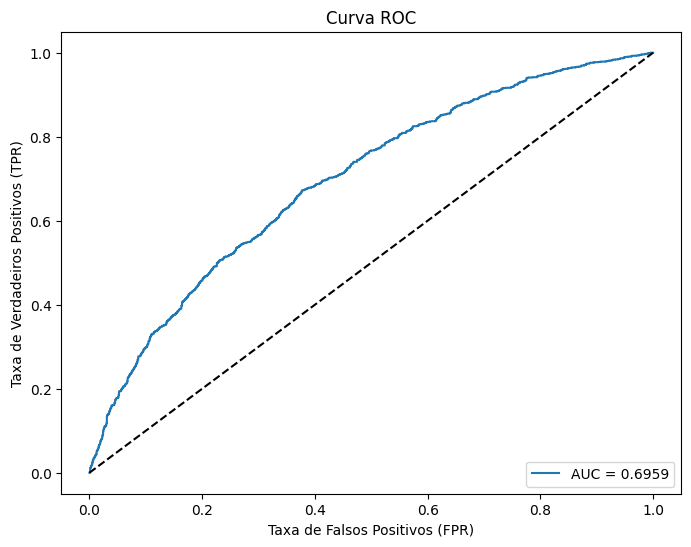

In [ ]:
import matplotlib.pyplot as plt
# A) Aplique o modelo aos dados de teste.
# Previsões já foram feitas na etapa anterior:
# y_pred = model.predict(X_test_final)
# y_prob = model.predict_proba(X_test_final)[:, 1] # Probabilidade da classe positiva (1)

# B) Avalie as métricas do modelo treinado
print("\nRe-avaliação das métricas do modelo no conjunto de teste:")
print(classification_report(y_test_final, y_pred))

# Calcular a Área Sob a Curva ROC (AUC) - já calculada anteriormente
auc = roc_auc_score(y_test_final, y_prob)
print(f"AUC: {auc:.4f}")

# Calcular e imprimir métricas individuais para clareza nesta seção
accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred)
recall = recall_score(y_test_final, y_pred)
f1 = f1_score(y_test_final, y_pred)

print("Metricas individuais:")
print(f"\nAcurácia: {accuracy:.4f}")
print(f"Precisão (classe 1): {precision:.4f}")
print(f"Recall (classe 1): {recall:.4f}")
print(f"F1-Score (classe 1): {f1:.4f}")


# C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

# Plotar a Curva ROC - já plotada anteriormente,
fpr, tpr, thresholds = roc_curve(y_test_final, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--') # Linha de base aleatória
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Explicação da Curva ROC e AUC:

A Curva ROC (Receiver Operating Characteristic) é um gráfico que ilustra o desempenho de um modelo de classificação binária em vários limites de discriminação.
No eixo X, temos a Taxa de Falsos Positivos (FPR - False Positive Rate), que é a proporção de negativos reais que foram incorretamente classificados como positivos. Ela é calculada como (Falsos Positivos) / (Falsos Positivos + Verdadeiros Negativos).
No eixo Y, temos a Taxa de Verdadeiros Positivos (TPR - True Positive Rate), também conhecida como Recall ou Sensibilidade. É a proporção de positivos reais que foram corretamente classificados como positivos. Ela é calculada como (Verdadeiros Positivos) / (Verdadeiros Positivos + Falsos Negativos).

A Curva ROC é plotada variando o limite de classificação do modelo. Para cada limite, calculamos o TPR e o FPR e plotamos um ponto no gráfico. Mover o limite altera o trade-off entre TPR e FPR.
- Um ponto no canto superior esquerdo (TPR=1, FPR=0) representaria um classificador perfeito que identifica todos os positivos sem falsos positivos.
- A linha diagonal (tracejada) representa um classificador aleatório, com AUC de 0.5.
- Quanto mais a curva se aproxima do canto superior esquerdo e se afasta da linha diagonal, melhor é o desempenho do modelo.

A AUC (Area Under the Curve - Área Sob a Curva) é a medida da área total sob a Curva ROC. Ela fornece um valor único que resume o desempenho do modelo em todos os limites possíveis.
Neste caso, a AUC obtida é de 0.6959.

Análise da Curva ROC e AUC:
A Curva ROC gerada para o nosso modelo se encontra acima da linha diagonal, o que indica que nosso modelo tem um desempenho melhor do que um classificador aleatório.
O valor da AUC de 0.6959 quantifica essa performance. Um valor próximo a 1.0 seria ideal, enquanto 0.5 indica um desempenho aleatório.
Uma AUC mais próxima de 0.5 sugere que o modelo tem um desempenho preditivo limitado.

Através da Curva ROC, podemos analisar como o modelo se comporta ao ajustarmos o ponto de corte para decidir se um paciente tem a doença ou não. Se priorizarmos identificar o máximo de casos positivos (alto Recall/TPR), podemos tolerar um número maior de falsos positivos (maior FPR). Se priorizarmos ter pouquíssimos falsos positivos (baixo FPR), podemos acabar perdendo alguns casos positivos (menor TPR).
A AUC de 0.6959 nos dá uma medida geral da qualidade do ranking das previsões de probabilidade do modelo, indicando a probabilidade de que o modelo classifique corretamente um par aleatório de um positivo e um negativo.
Em resumo, a Curva ROC e a AUC confirmam que nosso modelo de Regressão Logística tem uma capacidade preditiva útil para identificar pacientes com probabilidade de desenvolverem doenças cardiovasculares.

# 7) Explique:

A) Explique com suas palavras regressão logistica.

B) Explique porque a regressão logistica é um modelo de classificação.

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.



A) A regressão logística é um modelo usado para prever a probabilidade de um evento acontecer, principalmente quando o resultado é binário (ou seja, tem apenas duas opções, como "sim ou não", "verdadeiro ou falso", "aprovado ou reprovado").        

B) Mesmo tendo "regressão" no nome, ela é um modelo de classificação porque ela classifica os dados em categorias, como “sim” ou “não”. O modelo não entrega diretamente a classe, mas sim uma probabilidade de pertencer a uma classe. Depois, essa probabilidade é convertida em uma decisão usando um limite de corte (geralmente 0,5).          

C) Apesar de terem objetivos diferentes, elas compartilham algumas semelhanças:

Estrutura matemática parecida:
Ambas calculam uma combinação linear dos dados (como y = b0 + b1*x1 + b2*x2 + ...).

Uso de variáveis independentes (X):
Ambas tentam entender como os valores das variáveis de entrada (X) influenciam o resultado.

Treinamento com função de custo:
As duas ajustam os coeficientes (b0, b1, ...) para minimizar um erro durante o treinamento (embora usem funções de custo diferentes).

Interpretação dos coeficientes:
Em ambas, os coeficientes indicam a influência de cada variável na saída (na logística, indicam o impacto sobre a probabilidade).                                  
